# Customer churn prediction using ANN

video number 18

video = https://youtu.be/MSBY28IJ47U?si=eiD1-7-rk8GvtX0g

## What is Customer Churn?

We will be doing Customer churn prediction.

Customer churn is nothing but, like how many of your customers are leaving the business, for example if ur in a wireless business, some people stop their wireless servies and they move onto different services

Or another example, Banks, Banks also use Customer churn prediction where some customer closes their account and they go with some different bank, so then previous bank would wanna know why Customers are leaving.

So these Customer churn concept pretty much applies to any business where u have customers and all of sudden customers leaves the business, so Deep Learning can help you figure out or kind of measure why customers are leaving and once u know that then u can take appropriate actions so customers dont leave

## Introduction to the Tutorial
So we will use a dataset from Kaggle, and we will write a simple **Artificial Neural Network (ANN)** using Tensorflow, and we will also discuss about Precision, F1-Score and all of those terms, we will also run a Classification Report, etc!

## The Dataset we will be using
So, we will be using Telecom Customer Churn dataset from Kaggle

Download link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

So, if u look at this dataset, we can see there are alot of records and features such as gender, SeniorCitizen, tenure, InternetService, PaymentMethod, MontlyCharges, TotalCharges, etc... so many attributes we can have a use of!

## ---------------- Python Code ---------------- 

### Import Dependencies

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Loading the Data in Pandas DataFrame

In [115]:
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\Faiz Khan Program\\DEEP LEARNING\\CODEBASICS\\datas\\Telco-Customer-Churn.csv")

In [116]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

### Exploratory Data Analysis (EDA)

Now, whenever ur working on a ML problem, first thing that u do is u try to do Data Exploration.

First thing we can notice from the dataset is CustomerID is useless since we never have any use of any ID's in ML, so will simply drop it

In [117]:
df.drop(["customerID"], axis=1, inplace=True)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

Now, lets check datatypes of all the columns

In [118]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Above if u notice, we can see that, the **TotalCharges** column type is object when its supposed to be a string, lets inspect

In [119]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

We can see they are in strings, we will need to conver them into numbers, we can convert a whole DataFrame column using pandas **to_numeric()** function

In [120]:
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

Now, we got an error!

We can see that the error happens cause it encountered some values which has space in them, so we need to do something about these spaces

First lets just look at those rows which has these spaces in them in the **TotalCharges** column.

One way to look is, see, when u supply "errors=coerce" argument in **to_numeric()**, it will ignore the errors, basically it will do conversion for whatever columns and where u have spaces it will like put NA in it, then will simply do **isnull()** basically it will tell us which row has null values, then will simply supply these as an index in the DF so below line will return all rows where **isnull()** is true for **TotalCharges** col

In [121]:
df[pd.to_numeric(df['TotalCharges'], errors="coerce").isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [122]:
df.shape

(7043, 20)

We can see, these are all the datas with NA or empty values in **TotalCharges** column, there are only like 11 of them so will just DROP them

In [123]:
df.drop(df[pd.to_numeric(df['TotalCharges'], errors="coerce").isnull()].index, inplace=True)
df.shape

(7032, 20)

In [124]:
df[pd.to_numeric(df['TotalCharges'], errors="coerce").isnull()]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

Now u can see its been deleted!

In [125]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see our **TotalCharges** is still object, now that we have dropped the column with spaces or null, we will convert it again to numeric using **to_numeric** and assign it back to the **TotalCharges** column

In [126]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now we can see its a float now!

Now, the next thing we wanna do is some quick visualization

hmm..so what kind of visualization can we do? the **tenure** column seems pretty interesting since it can show how loyal the customer is, like if ur customer is with ur company for 20-30 years it means the customer is loyal! 

So, i want to know how many of the Loyal customers are leaving, so for that i think Histogram might be a good idea where u draw side by side num of customers leaving and num of customers not leaving and ur X axis will be **tenure**

So lets find out the tenure of customers that are not leaving and are leaving and store them seperately

In [127]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

In [128]:
tenure_churn_yes = df[df['Churn']=="Yes"]['tenure']
tenure_churn_no = df[df['Churn']=="No"]['tenure']

Now, lets plot these side by side using Histogram

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

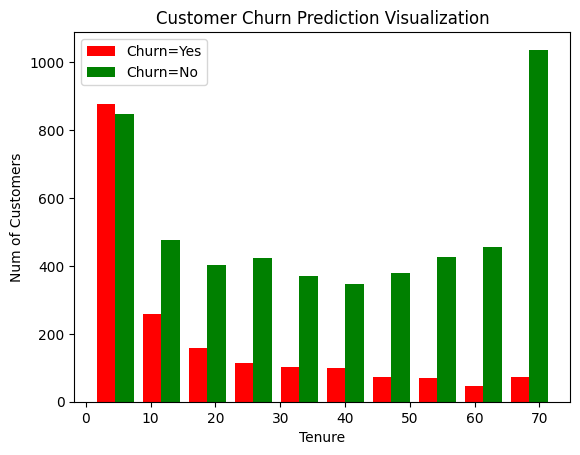

In [129]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("Num of Customers")
plt.title("Customer Churn Prediction Visualization")

We can see that loyal Customers with more tenure are likely to not Leave while the new Customers are likely to leave, However, this is also bevause i think there is an Imbalance in the dataset as there are way more Customer with Churn=No than Churn=Yes!

Lets check the ratio

In [130]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [131]:
1869 / 5163

0.36199883788495063

We can see the ratio is pretty low meaning its definately Imbalance as there are way more Churn=No then Churn=Yes.

Now, imbalance in dataset can lead to certain problems in Machine Learning and Deep Learning, but for now lets keep it aside and continue with our Visualization

We can do the same plotting above with another column now but this time lets try **MonthlyCharges**

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

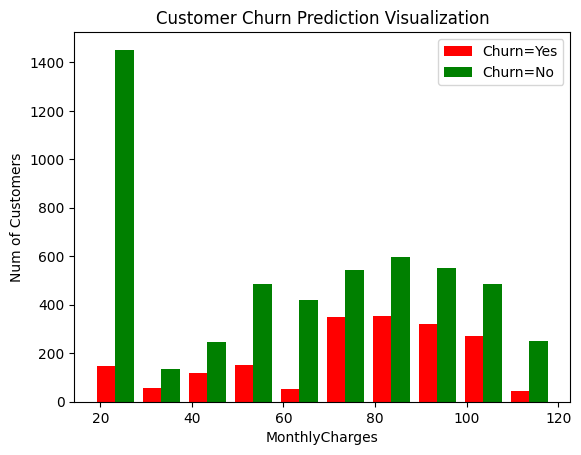

In [132]:
MonthlyCharges_churn_yes = df[df['Churn']=="Yes"]['MonthlyCharges']
MonthlyCharges_churn_no = df[df['Churn']=="No"]['MonthlyCharges']

plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], 
         color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()
plt.xlabel("MonthlyCharges")
plt.ylabel("Num of Customers")
plt.title("Customer Churn Prediction Visualization")

We can see that Customers with less MonthlyCharges are more likely to NOT leave while Customers more MonthlyCharges are likely to leave 

##### NOTE: Some Visualization can be bias due to the dataset being imbalance, so keep that in mind

### Data Preprocessing and Cleaning
Now, one thing if u noticed, In the dataset, many of the columns have values like Yes and No

In [133]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

So what we can do is, figure out the Unique values of this Yes/No columns which are objects.

So that we can do **Encoding** since i believe these are Nominal categories because:

1. "Yes" and "no" are nominal categories because neither has a natural order or rank over the other. They are simply two distinct categories.
2. If the variable were ordinal, it might represent levels of agreement or magnitude (like "strongly agree", "agree", "disagree", "strongly disagree"), where there is a clear sequence or hierarchy.
3. Therefore, in most machine learning applications, when you have a binary variable with categories like "yes" and "no", you would treat it as a nominal categorical variable.

So here we can perform OneHotEncoding as they are considered Nominal Categories but for making things simple, lets just do Label Encoding on them because you see if you have just 2 categories like Yes and No, it wont be much of a problem so its fine even if u do Label Encoding instead of OneHotEncoding

In [134]:
for column in df.columns:
    if df[column].dtypes == "object":
        print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Now, if u observe, for example like in the **OnlineSecurity** column, along with Yes and No there are other values like "No internet service" or in **MultipleLines** column there are "No phone service", so all these are basically just "No", so will simply replace them with just No, as they belong to "No" Category only

So we can simply use Pandas **replace()** function

In [135]:
df.replace("No internet service", "No", inplace=True)
df.replace("No phone service", "No", inplace=True)

In [136]:
for column in df.columns:
    if df[column].dtypes == "object":
        print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Now we can see its better now

Now, we wanna replace Yes and No with 1 and 0 since we know ML and NN only talks in numbers

In [137]:
df.replace({
    "Yes" : 1,
    "No" : 0
}, inplace=True)

OOPS, with this we also converted the "No" in **InternetService** column to 0, so lets make it back to "No" very quickly 

In [142]:
df['InternetService'].replace(0, "No", inplace=True)

In [143]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


Now we can see all those columns became numbers to 0 and 1

Now that we have handled the Yes and No Categorical columns, we can handle the other Categorical columns like **gender**, so i guess will just do the same thing here even tho **gender** is a Nominal variable but will do same thing since there are only 2 Unique values

In [145]:
df['gender'].replace({"Female":0, "Male":1}, inplace=True)

Now other Categorical columns such as **InternetService, Contract, PaymentMethod** have more than 2 Unique values, so will perform OneHotEncoding here

In [160]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'],
              drop_first=True).astype(int)

In [164]:
df.shape

(7032, 24)

In [167]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0              29            29      0                            0   
1              56          1889      0                            0   
2              53           108      1                            0   
3              42          1840      0                            0   
4              70           151      1                            1   

   InternetService_No  Contract_One year  Contract_Two year  \
0                   0                  0                  0   
1                   0                  1                  0   
2                   0                  0                  0   
3                   0                  1                  0   
4                   0                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 24 columns]

In [165]:
df.dtypes

gender                                   int32
SeniorCitizen                            int32
Partner                                  int32
Dependents                               int32
tenure                                   int32
PhoneService                             int32
MultipleLines                            int32
OnlineSecurity                           int32
OnlineBackup                             int32
DeviceProtection                         int32
TechSupport                              int32
StreamingTV                              int32
StreamingMovies                          int32
PaperlessBilling                         int32
MonthlyCharges                           int32
TotalCharges                             int32
Churn                                    int32
InternetService_Fiber optic              int32
InternetService_No                       int32
Contract_One year                        int32
Contract_Two year                        int32
PaymentMethod

Now we can see, everything is in numbers!

In [166]:
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count   7032.000000    7032.000000     7032.000000   7032.000000   
mean       0.903299       0.421928        0.286547      0.344852   
std        0.295571       0.493902        0.452180      0.475354   
min        0.000000       0.000000        0.000000      0.000000   
25%        1.000000       0.000000        0.000000      0.000000   
50%        1.000000       0.000000        0.000000      0.000000   
75%        1.000000       1.000000        1.000000      1.000000   
max        1.000000       1.000000        1.000000      1.000000   

       DeviceProtection  ...  MonthlyCharges  TotalCharges        Churn  \
count       7032.000000  ...     7032.000000   7032.000000  7032.000000   
mean           0.343857  ...       64.332480   2282.830489     0.265785   
std            0.475028  ...       30.088668   2266.768490     0.441782   
min            0.000000  ...       18.000000     18.000000     0.000000   
25%            0.000000  ...       35.000000    401.000000     0.000000   
50%            0.000000  ...       70.000000   1397.000000     0.000000   
75%            1.000000  ...       89.000000   3794.250000     1.000000   
max            1.000000  ...      118.000000   8684.000000     1.000000   

       InternetService_Fiber optic  InternetService_No  Contract_One year  \
count                  7032.000000         7032.000000        7032.000000   
mean                      0.440273            0.216155           0.209329   
std                       0.496455            0.411650           0.406858   
min                       0.000000            0.000000           0.000000   
25%                       0.000000            0.000000           0.000000   
50%                       0.000000            0.000000           0.000000   
75%                       1.000000            0.000000           0.000000   
max                       1.000000            1.000000           1.000000   

       Contract_Two year  PaymentMethod_Credit card (automatic)  \
count        7032.000000                            7032.000000   
mean            0.239619                               0.216297   
std             0.426881                               0.411748   
min             0.000000                               0.000000   
25%             0.000000                               0.000000   
50%             0.000000                               0.000000   
75%             0.000000                               0.000000   
max             1.000000                               1.000000   

       PaymentMethod_Electronic check  PaymentMethod_Mailed check  
count                     7032.000000                 7032.000000  
mean                         0.336320                    0.228100  
std                          0.472483                    0.419637  
min                          0.000000                    0.000000  
25%                          0.000000                    0.000000  
50%                          0.000000                    0.000000  
75%                          1.000000                    0.000000  
max                          1.000000                    1.000000  

[8 rows x 24 columns]

Now, moving onto the next step..

In Deep Learning, the Scaling step is very important.

If u notice now in our dataset, like the **tenure** column have like range between 1 to 72 while other column such as **MonthlyCharges** and **TotalCharges** ranges between 18 to 8k so we need to do scaling to scale them to range of 0 to 1

We dont need to do scaling for Categorical columns that has been OneHotEncoded since they are already 0 and 1

In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [175]:
df.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.000000             0   
1       1              0        0           0  0.464789             1   
2       1              0        0           0  0.014085             1   
3       1              0        0           0  0.619718             0   
4       0              0        0           0  0.014085             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0            0.11      0.001269      0                            0   
1            0.38      0.215901      0                            0   
2            0.35      0.010385      1                            0   
3            0.24      0.210247      0                            0   
4            0.52      0.015347      1                            1   

   InternetService_No  Contract_One year  Contract_Two year  \
0                   0                  0                  0   
1                   0                  1                  0   
2                   0                  0                  0   
3                   0                  1                  0   
4                   0                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 24 columns]

Now we can see these columns have been scaled.

So we are done with Data Cleaning and Data Preprocessing, now our Data is ready to be used in our Machine Learning and Deep Learning

## DEEP LEARNING PART

In [176]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [180]:
X_train.shape

(5625, 23)

In [182]:
X_test.shape

(1407, 23)

We will create 1 input/hidden layer with 23 neurons cuz our num of features is 23

Output layer will have 1 neuron since output is either 0 or 1

In compile we will use "binary_crossentropy" since we are dealing with binary classification

In [188]:
model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,)),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", 
             loss="binary_crossentropy",
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.4793 - accuracy: 0.7664
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8004
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8055
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8034
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8071
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8064
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.8052
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4074 - accura

In [189]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7783


[0.4769943356513977, 0.778251588344574]

In [190]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [191]:
y_pred

array([[0.3367455 ],
       [0.5535468 ],
       [0.0100092 ],
       ...,
       [0.7601453 ],
       [0.79935044],
       [0.64708173]], dtype=float32)

In [192]:
y_test

2660    0
744     0
5579    1
64      1
3287    1
       ..
2024    0
4396    1
4081    1
1297    0
4899    1
Name: Churn, Length: 1407, dtype: int32

Well, our accuracy was pretty good and we also got our predicted values but there is a problem, we can see above that **y_pred** is in 2D array unlike **y_test** and another problem is that its in range of 0 and 1 but we want exactly either 0 or 1

Lets comvert the predicted value to 0 or 1 first, we can simply do it by running a for loop then saying if its above 0.5 then its 1, else 0

In [193]:
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

In [195]:
y_pred[:5]

[0, 1, 0, 1, 0]

See, now its either 0 and 1, so this is our Predicted value, lets see how many wrong we got

In [198]:
len(y_pred)

1407

In [199]:
np.sum(y_pred != y_test)

312

Hmm, not bad, i mean out of 1407 we got 312 wrong

Now, we want to print a Classification report.

So Classification report will print the statistics on precision recall and we will see whats precision recall is, but this will basically show the performance of overall model

We will get into Classification report later, now lets make a Confusion Matrix

Text(95.72222222222221, 0.5, 'Actual values')

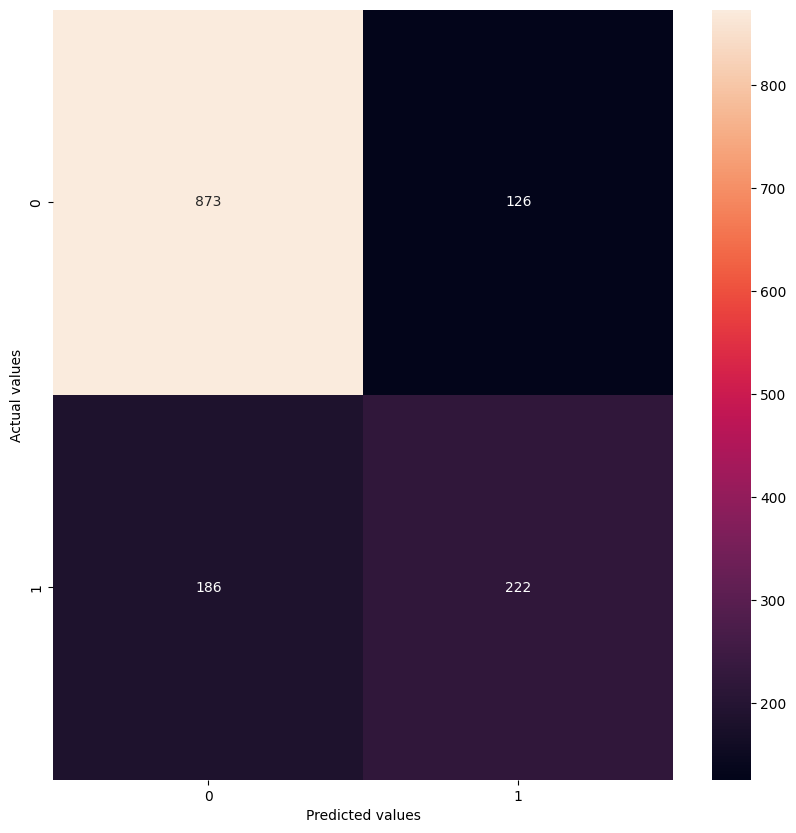

In [218]:
import seaborn as sns
cm = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

We can also manually calculate our accuracy by doing total num of correct prediction / total num of predictions.

we just round it to 2 decimal, so dont get confused by the 2

In [226]:
round((873+222) / (873+126+186+222), 2)

0.78

Now lets do Classification report

In [200]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       999
           1       0.64      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Lets see whats these values are.

0 and 1 on the side are our classes, since we are doing binary classification and have 2 class which is either 0 or 1, so thats what it is, in our case 0 basically mean Customers who left our business, and 1 who stayed

### Precision for 0 class. i.e Precision for Customers who did not Churn (Didn't Leave)

So precision for 0th class which is **0.82**, it basically means num of correct predictions that our NN made for 0 which is 873, because it predicted 0 a total of 873 + 186 num of times and out of that 873 were correct

**Formula = Correct prediction for 0 / Total predictions for 0**

In [227]:
round((873) / (873+186), 2)

0.82

### Precision for 1 class. i.e Precision for Customers who Churned or Left
So precision for 1 class which is 0.64, it basically means num of correct predictions that our NN made for 1 which is 222, because it predicted 1 a total of 126 + 222 num of times and out of that only 222 were correct.

**Formula = Correct prediction for 1 / Total predictions for 1**

In [228]:
round((222) / (126 + 222), 2)

0.64

### Recall for 0 class
So Recall is basically your Total Truth, so for 0th class recall is **0.87**, because if you do Total Correct predictions for 0 divide by Total samples with 0 u will get **0.87**

In our case, Our NN predicted 0 correctly 873 times, and total num of samples with 0 is 873 + 126

**Formula = Total Correct predictions for 0 / Total samples with 0**

In [231]:
round((873) / (873 + 126), 2)

0.87

### Recall for 1 class
So Recall is basically your Total Truth, so for 1 class recall is **0.54**, because if you do Total Correct predictions for 1 divide by Total samples with 1 you will get **0.54**.

In our case, Our NN predicted 1 correctly 222 times, and total num of samples with 1 is 222 + 186

**Formula = Total Correct predictions for 0 / Total samples with 0**

In [233]:
round((222) / (222 + 186), 2)

0.54

We will do a seperate tutorial next for Precision, Recall, F1-Score for better understanding